#### Problem Statement:
Build the linear regression model using scikit learn in boston data to predict 'Price' based on other dependent variable.

In [1]:
#importing the necessary module and libraries
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn.linear_model  import ElasticNet, ElasticNetCV, LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [2]:
data=pd.read_csv('data.csv')
df=data.copy()

In [3]:
df.head()

,x1,x2,y
0,-119.366669,115.000000,1
1,-101.108045,97.777159,1
2,-130.278658,106.767654,1
3,-114.703415,101.195477,1
4,-119.366669,115.000000,1


In [4]:
df.shape

(2227, 3)

In [5]:
X = df[['x1','x2']]
Y = df['y']

In [6]:
Y

0       1
1       1
2       1
3       1
4       1
       ..
2222    0
2223    0
2224    0
2225    0
2226    0
Name: y, Length: 2227, dtype: int64

In [7]:
Y.unique()
#Therefore basically this is a classification problem

array([1, 0], dtype=int64)

In [8]:
df

,x1,x2,y
0,-119.366669,1.150000e+02,1
1,-101.108045,9.777716e+01,1
2,-130.278658,1.067677e+02,1
3,-114.703415,1.011955e+02,1
4,-119.366669,1.150000e+02,1
...,...,...,...
2222,98.714112,8.964312e+01,0
2223,96.633331,9.100000e+01,0
2224,85.673940,1.038393e+02,0
2225,78.958862,7.860537e+01,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2227 entries, 0 to 2226
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      2222 non-null   float64
 1   x2      2224 non-null   float64
 2   y       2227 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 52.3 KB


In [10]:
#First of all we have to some preprocess and clean our data
#Filling null by mean

In [11]:
df['x1'].fillna(df['x1'].mean(),inplace=True)
df['x2'].fillna(df['x2'].mean(),inplace=True)

In [12]:
df.describe()

,x1,x2,y
count,2227.000000,2.227000e+03,2227.000000
mean,-4.818766,8.947626e+04,0.442299
std,74.855697,2.981312e+06,0.496771
min,-134.369160,-1.348761e+02,0.000000
25%,-71.581453,-7.997687e+01,0.000000
50%,-9.124370,-1.000000e+00,0.000000
75%,59.633331,6.400540e+01,1.000000
max,134.508687,1.000000e+08,1.000000


C:\Users\ANKDIP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ANKDIP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ANKDIP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-

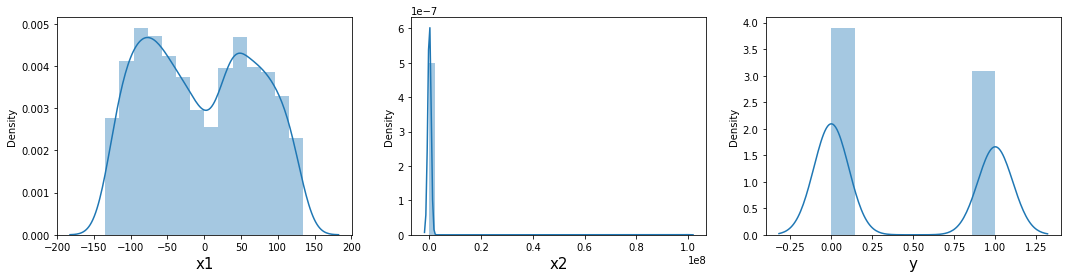

In [13]:
# let's see how data is distributed for every column
plt.figure(figsize=(18,4), facecolor='white')
plotnumber = 1

for column in df.columns:
    if plotnumber<=3 :
        ax = plt.subplot(1,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.show()

In [14]:
df.skew()

x1     0.072668
x2    33.347824
y      0.232513
dtype: float64

In [15]:
def skew_handling(df, trans= 'yeojohnson'):
    for col in df.columns:
        if df[col].dtype!='O' and abs(df[col].skew())>1:
           flag = 0
           if trans == 'sqrt':
                for elm in df[col].unique():
                    if elm < 0:
                        flag=1
                        break
                if flag==0:
                   df[col]=np.sqrt(df[col]) 
                
           elif trans == 'log':
                for elm in df[col].unique():
                        if elm <= 0:
                            flag=1
                            break
                if flag==0:
                   df[col]=np.log(df[col])
                    
           elif trans == 'boxcox':
                for elm in df[col].unique():
                        if elm <= 0:
                            flag=1
                            break
                if flag==0:
                    df[col], param = stats.boxcox(df[col]) 
                    
           if trans == 'yeojohnson' or flag == 1:
              df[col], param = stats.yeojohnson(df[col].astype(float))
    return df

In [16]:
skew_handling(df)

,x1,x2,y
0,-119.366669,15.964157,1
1,-101.108045,14.726881,1
2,-130.278658,15.386688,1
3,-114.703415,14.981584,1
4,-119.366669,15.964157,1
...,...,...,...
2222,98.714112,14.100109,0
2223,96.633331,14.206804,0
2224,85.673940,15.175302,0
2225,78.958862,13.196585,0


In [17]:
df.skew()

x1    0.072668
x2    2.326336
y     0.232513
dtype: float64

C:\Users\ANKDIP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ANKDIP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ANKDIP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-

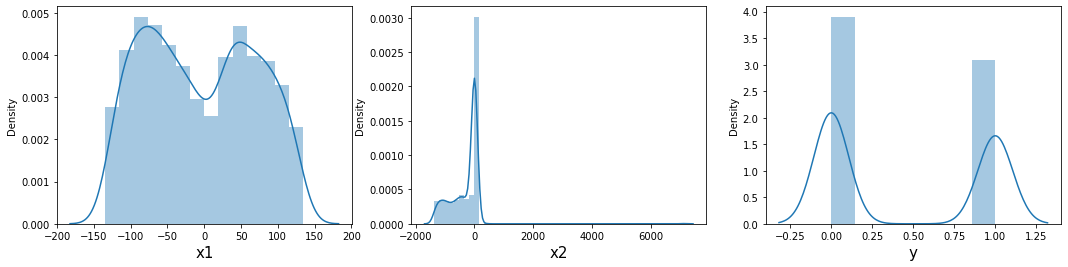

In [18]:
# let's see how data is distributed for every column
plt.figure(figsize=(18,4), facecolor='white')
plotnumber = 1

for column in df.columns:
    if plotnumber<=3 :
        ax = plt.subplot(1,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.show()

<AxesSubplot:>

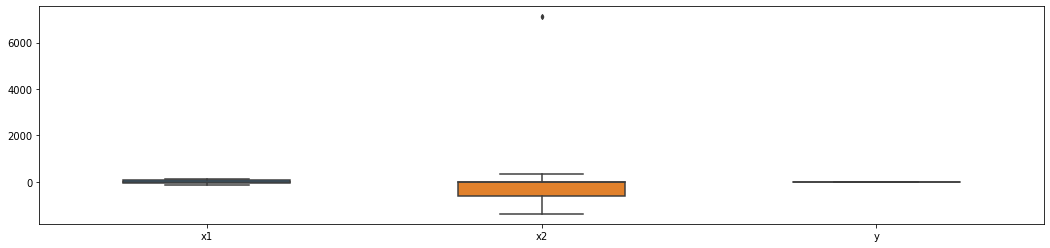

In [19]:
fig, ax = plt.subplots(figsize=(18,4))
sns.boxplot(data=df, width= 0.5,ax=ax,  fliersize=3)

In [20]:
def remove_outliers_interquartile(qu_dataset, qu_field, qu_fence='inner'):
    a = qu_dataset[qu_field].describe()
    iqr = a["75%"] - a["25%"]
    
    if qu_fence == "inner":
        upper_inner_fence = a["75%"] + 1.5 * iqr
        lower_inner_fence = a["25%"] - 1.5 * iqr
        output_dataset = qu_dataset[qu_dataset[qu_field]<=upper_inner_fence]
        output_dataset = output_dataset[output_dataset[qu_field]>=lower_inner_fence]
     
    elif qu_fence == "outer":
        upper_outer_fence = a["75%"] + 3 * iqr
        lower_outer_fence = a["25%"] - 3 * iqr
        output_dataset = qu_dataset[qu_dataset[qu_field]<=upper_outer_fence]
        output_dataset = output_dataset[output_dataset[qu_field]>=lower_outer_fence]
    
    percent_removed=100*(len(qu_dataset)-len(output_dataset))/len(qu_dataset)
    outlier_dict = {'initial_length':len(qu_dataset),'updated_length':len(output_dataset),'percent_removed(%)':percent_removed}
    
    return outlier_dict,output_dataset

In [21]:
outlier_dict,df=remove_outliers_interquartile(df, 'x2')

In [22]:
outlier_dict

{'initial_length': 2227,
 'updated_length': 2225,
 'percent_removed(%)': 0.0898069151324652}

<AxesSubplot:>

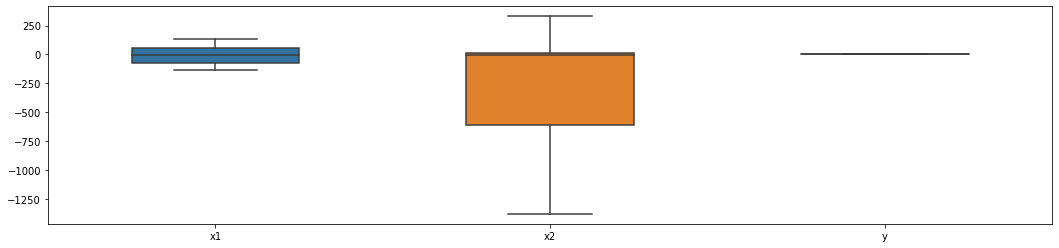

In [23]:
fig, ax = plt.subplots(figsize=(18,4))
sns.boxplot(data=df, width= 0.5,ax=ax,  fliersize=3)

In [24]:
df.shape

(2225, 3)

In [25]:
df.head()

,x1,x2,y
0,-119.366669,15.964157,1
1,-101.108045,14.726881,1
2,-130.278658,15.386688,1
3,-114.703415,14.981584,1
4,-119.366669,15.964157,1


<AxesSubplot:xlabel='x1', ylabel='y'>

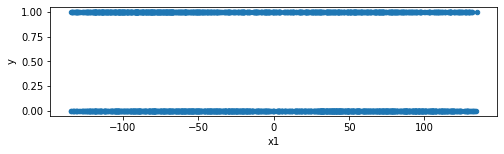

In [26]:
df.plot.scatter(x='x1',y='y',figsize=(8, 2))

<AxesSubplot:xlabel='x2', ylabel='y'>

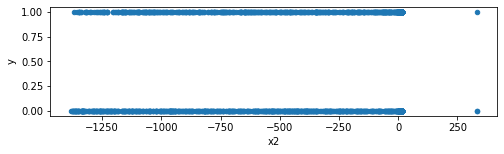

In [27]:
df.plot.scatter(x='x2',y='y',figsize=(8, 2))

In [28]:
x=df.drop(columns=['y'])
y=df['y']

In [29]:
#Here dependencies looks like linear.
#scaling
scaler =StandardScaler()

X_scaled = scaler.fit_transform(x)

In [30]:
#check for multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = X_scaled

vif = pd.DataFrame()

# here we make use of the variance_inflation_factor, which will basically output the respective VIFs 
vif["VIF"] = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]
# Finally, I like to include names so it is easier to explore the result
vif["Features"] = x.columns

In [31]:
vif

,VIF,Features
0,1.016535,x1
1,1.016535,x2


In [32]:
#We do not have any vif greater than 5.So we are good to go.
#Now split our data for training and testing.

In [33]:
x_train,x_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.25,random_state=355)

##### Logistic Regression

In [34]:
log_reg = LogisticRegression()

log_reg.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [35]:
log_reg.score(x_train,y_train)

0.7775779376498801

In [36]:
# Let's see how our model works on our test data set
y_pred = log_reg.predict(x_test)
accuracy=accuracy_score(y_test,y_pred)
accuracy

0.7450628366247756

In [37]:
#Confusion Matrix
conf_mat=confusion_matrix(y_test,y_pred)
conf_mat

array([[304,   1],
       [141, 111]], dtype=int64)

In [38]:
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]

In [39]:
# Precison
Precision = true_positive/(true_positive+false_positive)
Precision

0.9967213114754099

In [40]:
# Recall
Recall = true_positive/(true_positive+false_negative)
Recall

0.6831460674157304

In [41]:
# F1 Score
F1_Score = 2*(Recall * Precision) / (Recall + Precision)
F1_Score

0.8106666666666668

In [42]:
# Area Under Curve
auc = roc_auc_score(y_test, y_pred)
auc

0.7185987509758002

#### Decision Tree

In [43]:
clf = DecisionTreeClassifier()
clf.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [44]:
clf.score(x_train,y_train)

1.0

In [45]:
# accuracy of our classification tree
clf.score(x_test,y_test)

0.9228007181328546

In [46]:
# Let's create a function to create adjusted R-Squared
def adj_r2(x,y):
    r2 = clf.score(x,y)
    n = x.shape[0]
    p = x.shape[1]
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2

In [47]:
adj_r2(x_train,y_train)

1.0

In [48]:
adj_r2(x_test,y_test)

0.9225220203643811

### KNN

In [49]:
from sklearn.neighbors import KNeighborsClassifier

In [50]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(x_train, y_train)
knn.score(x_test, y_test)

0.9281867145421903

In [51]:
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
knn.score(x_test, y_test)

0.9317773788150808

In [60]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)
knn.score(x_test, y_test)

0.9353680430879713

### SVM with Linear and RBF Kernel

In [ ]:
# Create an Instance of SVM and Fit out the data.
# Data is not scaled so as to be able to plot the support vectors

In [53]:
# C is the SVM regularization parameter
C = 1.0 
# Create an Instance of SVM and Fit out the data.
# Data is not scaled so as to be able to plot the support vectors
linear_svc = svm.SVC(kernel ='linear', C = 1).fit(x_train, y_train)
rbf_svc= svm.SVC(kernel ='rbf', C = 1).fit(x_train, y_train)

In [54]:
linear_svc.predict([[-119.366669,15.964157]])

array([1], dtype=int64)

In [55]:
linear_svc.predict([[78.958862,13.196585]])

array([0], dtype=int64)

In [56]:
rbf_svc.predict([[-119.366669,15.964157]])

array([1], dtype=int64)

In [57]:
linear_svc.predict([[78.958862,13.196585]])

array([0], dtype=int64)

In [59]:
linear_svc.score(x_test,y_test)

0.7612208258527827

In [58]:
rbf_svc.score(x_test,y_test)

0.9138240574506283

### Model Comparison

##### Thank You...............